# LLaVA-NEXT Env:
python3.10下pip安装

In [ ]:
!git clone https://github.com/haotian-liu/LLaVA.git
!cd LLaVA
%pip install --upgrade pip  # enable PEP 660 support
%pip install -e .

In [3]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

model_path = "liuhaotian/llava-v1.6-mistral-7b" # 因内存限制，运行了7b参数模型，如果有条件可尝试："liuhaotian/llava-v1.6-34b" 
model_name = get_model_name_from_path(model_path)

/root/miniconda3/envs/llava/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import torch

class Configs:
    # model_path = "liuhaotian/llava-v1.6-mistral-7b" url
    model_path = "./llava-v1.6-mistral-7b" #本地模型参数
    model_base = None
    model_name = model_name
    image_file = ""
    query = ""
    conv_mode = None
    sep = ","
    temperature = 0.2
    top_p = None
    num_beams = 1
    max_new_tokens = 512
    device = "cuda"

import requests
from PIL import Image
from io import BytesIO
import re


def image_parser(args):
    out = args.image_file.split(args.sep)
    return out


def load_image(image_file):
    if image_file.startswith("http") or image_file.startswith("https"):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image


def load_images(image_files):
    out = []
    for image_file in image_files:
        image = load_image(image_file)
        out.append(image)
    return out

def get_device_map() -> str:
    return 'cuda' if torch.cuda.is_available() else 'cpu'

dev = get_device_map()  # 'cpu'
print(dev)
args = Configs()

cuda


In [5]:
from warnings import filterwarnings
import re
from llava.constants import (
    IMAGE_TOKEN_INDEX,
    DEFAULT_IMAGE_TOKEN,
    DEFAULT_IM_START_TOKEN,
    DEFAULT_IM_END_TOKEN,
    IMAGE_PLACEHOLDER,
)


filterwarnings("ignore")
tokenizer, model, image_processor, context_len = load_pretrained_model(
        args.model_path, args.model_base, model_name, load_4bit=True
    )

Loading checkpoint shards: 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]


mistral done.


### Table Detection on TableBank dataset

In [1]:
import json 
import os
import cv2
import matplotlib.pyplot as plt


def draw_detection_box(img_path, box_coordinates):
    img = cv2.imread(img_path)
    for box in box_coordinates:
        x1, y1, x2, y2 = box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 在图像上绘制矩形框
    
    plt.imshow(img)
    plt.show()

gts = json.load(open("data/tableBank/gt.json",'r'))
_10_imgs_dir = os.listdir("data/tableBank")
_10_imgs_dir.sort()
_10_imgs_dir = _10_imgs_dir[:-1]
print(_10_imgs_dir)
print(gts)
print(len(gts))




['%20%20%202013_2.jpg', '%20Edward%20Dawes%20paper_15.jpg', '%20Edward%20Dawes%20paper_7.jpg', '%20VNR%2014-I-9_5.jpg', '%28REVISED%29%20LEASE%2010%20PLUS%203%20AND%20PURCHASE%2044%20PLUS%203%20NEW%20VERSION_2.jpg', '%5B%EA%B2%BD%ED%97%98%EB%B3%B4%EA%B3%A0%EC%84%9C%5D%EC%9D%B4%EB%8C%80%ED%91%9C_2010120172_Arrhus_0.jpg', '%5BMS-DSSP%5D-170915_22.jpg', '%5BMS-DSSP%5D-170915_26.jpg', '%5BMS-GPAC%5D-150630_49.jpg', '%5BMS-GPFAS%5D-160714_16.jpg']
[{'file_name': '%20%20%202013_2.jpg', 'annotations': [{'category_id': 1, 'area': 285270, 'iscrowd': 0, 'segmentation': [[28, 211, 28, 766, 542, 766, 542, 211]], 'id': 101887, 'image_id': 78397, 'bbox': [28, 211, 514, 555]}]}, {'file_name': '%20%20%20_2.jpg', 'annotations': [{'category_id': 1, 'area': 132114, 'iscrowd': 0, 'segmentation': [[65, 333, 65, 624, 519, 624, 519, 333]], 'id': 101889, 'image_id': 78399, 'bbox': [65, 333, 454, 291]}]}, {'file_name': '%20Edward%20Dawes%20paper_13.jpg', 'annotations': [{'category_id': 1, 'area': 46172, 'iscro

-------------------------------------------- Table Detection ----------------------------------------------------------------


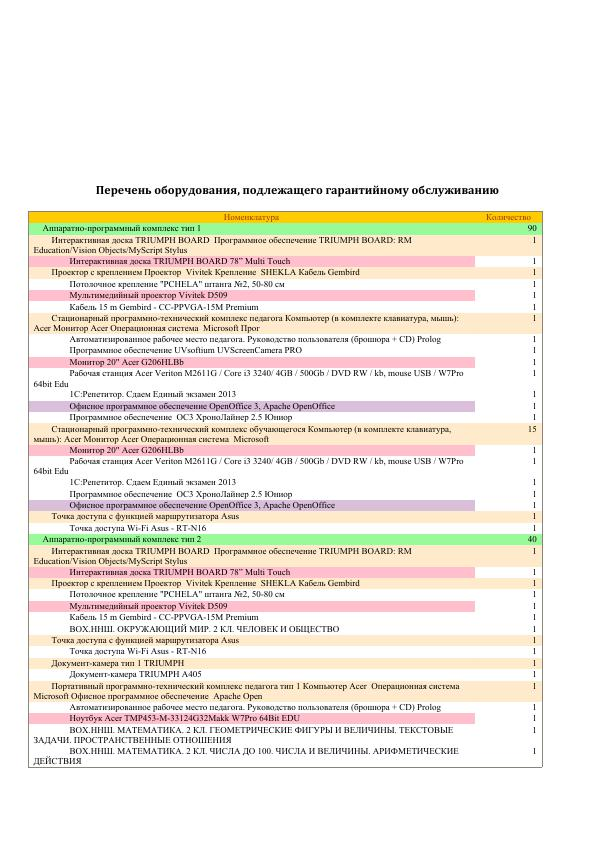

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  The image contains a table with text, and the table is divided into columns and rows. The table appears to be a list of items, possibly a catalog or a directory, with each row representing an entry and each column representing a different category or attribute.

Here are the positions of the tables within the image:

1. The main table is located at the center of the image, with the top left corner at approximately [0.000,0.000,0.998,0.986].

2. There are no other tables or significant layout elements that can be confidently detected within the image.

Please note that the detection box coordinates are approximate and may vary slightly depending on the specific software or method used for object detection.
-------------------------------------------- Table Detection -----

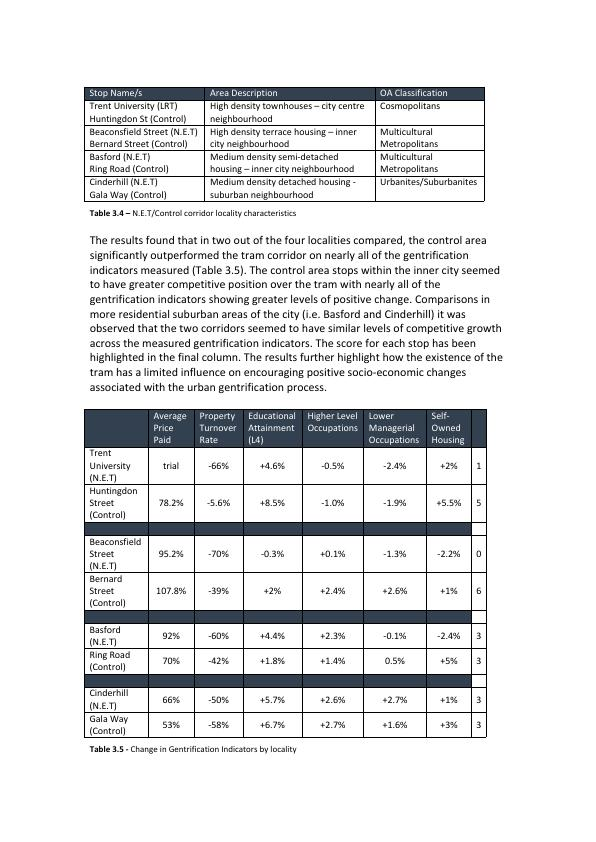

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  The image contains two tables, each with a header row and a body of data. Here are the detection box coordinates for each table:

1. Table 1 (on the left side of the image):
   - [0.000,0.158,0.350,0.988]

2. Table 2 (on the right side of the image):
   - [0.452,0.158,0.936,0.988]

Please note that the coordinates provided are relative to the image and do not include any margins or padding that might be present around the edges of the image.
-------------------------------------------- Table Detection ----------------------------------------------------------------


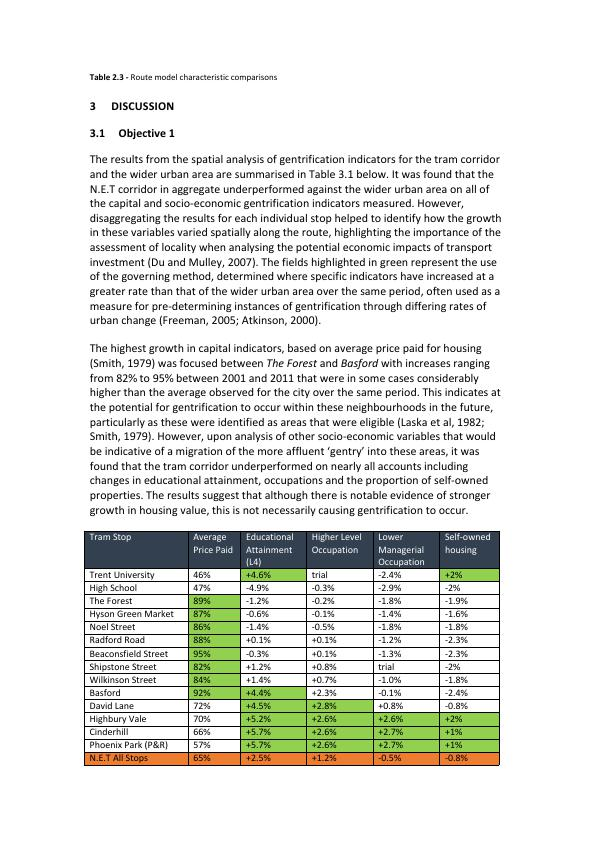

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  The tables in the image are positioned as follows:

1. The first table, which appears to be a summary of the data, is located at the bottom left corner of the image. Its coordinates are approximately [0.000,0.816,0.283,0.986].

2. The second table, which seems to be a more detailed breakdown of the data, is situated at the bottom right corner of the image. Its coordinates are approximately [0.708,0.816,0.983,0.986].

3. The third table, which is a comparison of different entities, is positioned at the top right corner of the image. Its coordinates are approximately [0.708,0.267,0.983,0.486].

4. The fourth table, which seems to be a comparison of different entities as well, is located at the bottom center of the image. Its coordinates are approximately [0.491,0.816,0.708

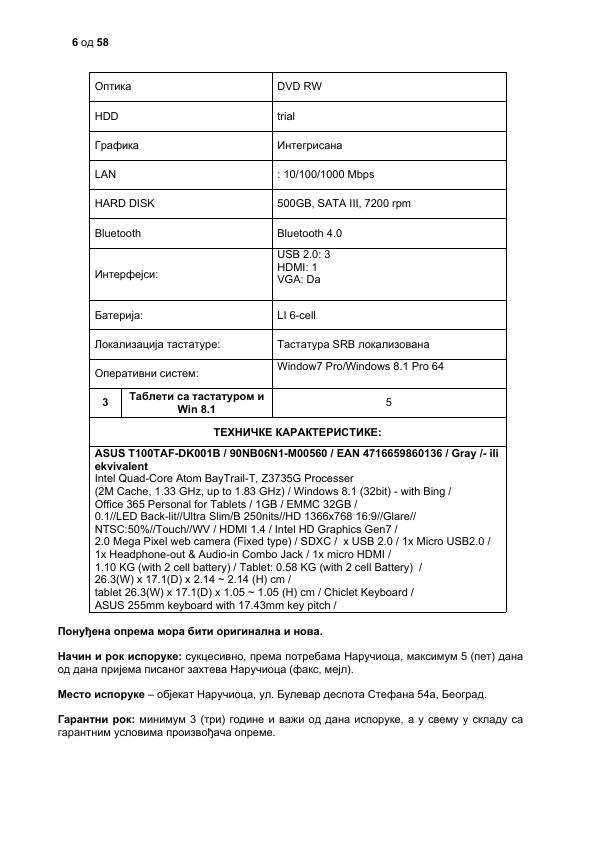

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  [0.000,0.000,0.998,0.988]
-------------------------------------------- Table Detection ----------------------------------------------------------------


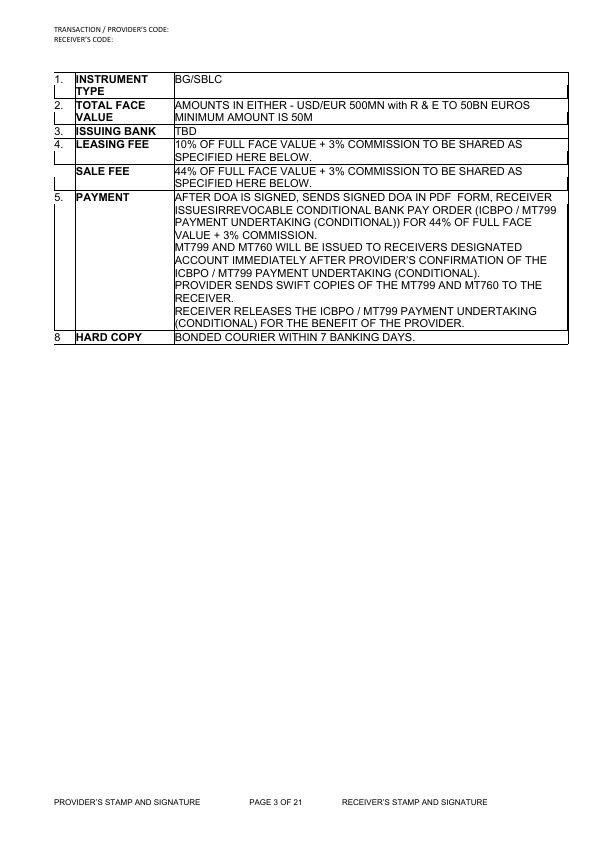

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  [0.000,0.000,0.998,0.988]
-------------------------------------------- Table Detection ----------------------------------------------------------------


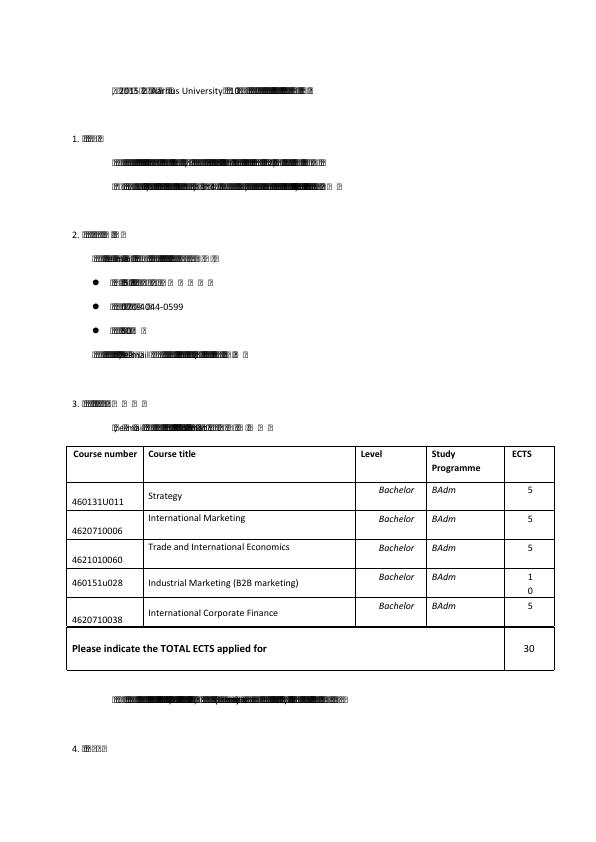

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  [0.000,0.000,1.000,0.986]
-------------------------------------------- Table Detection ----------------------------------------------------------------


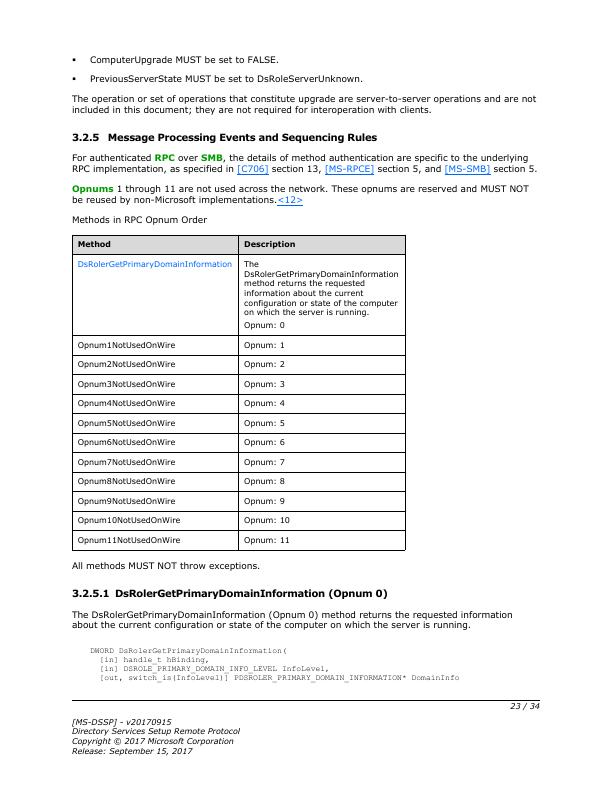

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  The image contains a table with the following detection box coordinates:

1. The table with the title "Message Processing Events and Sequencing Rules" is located at [0.170,0.225,0.838,0.650].
2. The table with the title "Description" is located at [0.170,0.225,0.838,0.650].
3. The table with the title "Method" is located at [0.170,0.225,0.838,0.650].
4. The table with the title "Description" is located at [0.170,0.225,0.838,0.650].

Please note that the coordinates provided are for the bounding boxes of the tables, and the actual content of the tables is not included in the bounding boxes.
-------------------------------------------- Table Detection ----------------------------------------------------------------


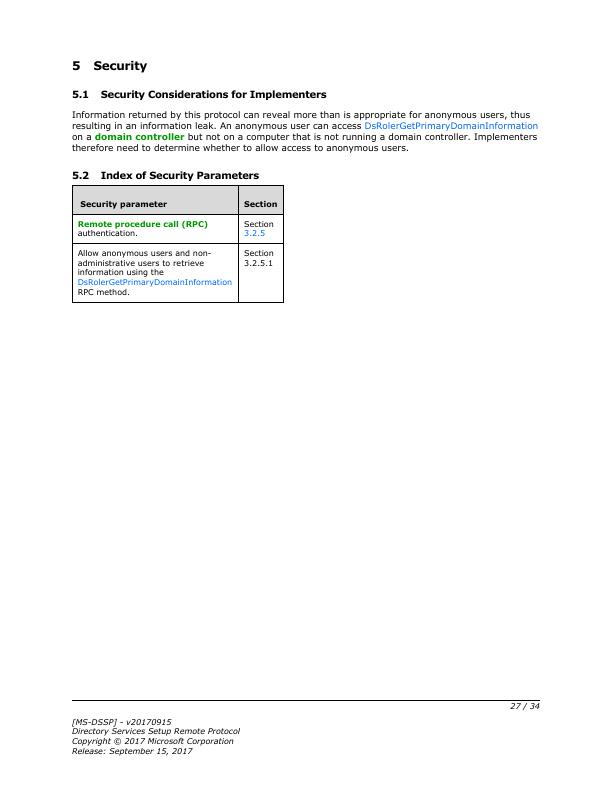

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  The image provided appears to be a page from a document or manual, specifically focusing on security considerations for implementers. The content is structured with headings, subheadings, and tables. Here are the positions of the tables within the image:

1. Table with the title "Security parameters" is located at the bottom of the page, just above the footer. The table spans the width of the page and is positioned at the bottom.

2. The footer of the page contains the following information:
   - On the left side of the footer, there is a reference to "MS-OSSPI v2.0715" with a release date of "September 15, 2017".
   - On the right side of the footer, there is a page number "27" indicating the page number of the document.

Please note that the image is too small to provi

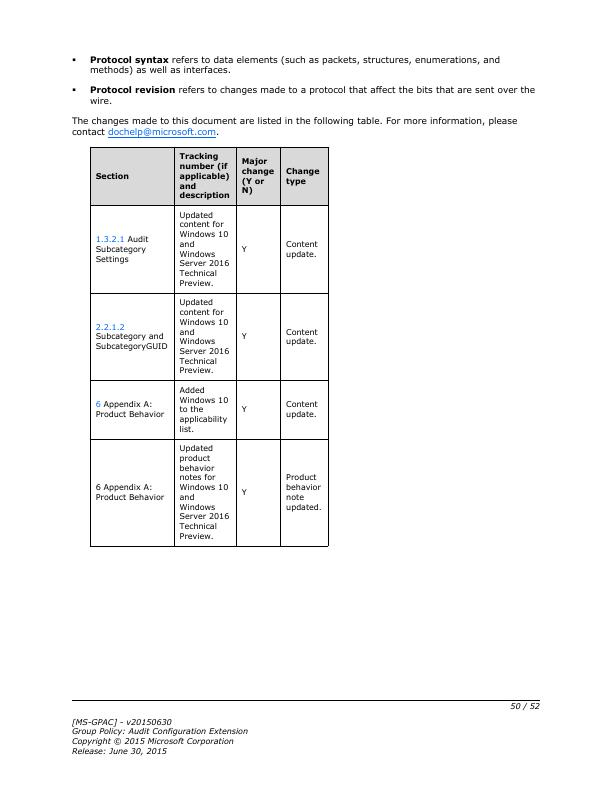

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  The image contains a table with various sections and columns. Here are the positions of the tables within the image:

1. The top-left table starts at [0.000,0.192,0.314,0.438].
2. The top-right table starts at [0.314,0.192,0.630,0.438].
3. The bottom-left table starts at [0.000,0.619,0.314,0.829].
4. The bottom-right table starts at [0.314,0.619,0.630,0.829].

Please note that the coordinates are relative to the image's dimensions and are given in the form of [left, top, right, bottom].
-------------------------------------------- Table Detection ----------------------------------------------------------------


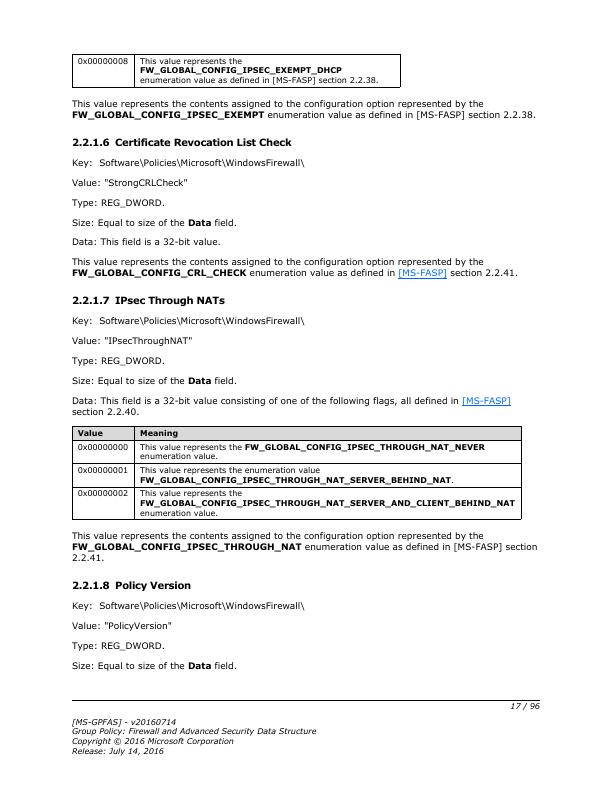

Question:  <image>
Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations.
Predicted Answer:  The image contains several tables with various pieces of information. Here are the positions of the tables as detection boxes:

1. The top-left table with the title "Fw/Global Config/IPsec/EXPMPT" has the following coordinates: [0.000,0.000,0.492,0.286]

2. The table titled "Fw/Global Config/IPsec/EXPMPT" with the subtitle "Immigration value as defined in NSFJ section 2.28" has the following coordinates: [0.000,0.000,0.492,0.286]

3. The table titled "Fw/Global Config/IPsec/EXPMPT" with the subtitle "Immigration value as defined in NSFJ section 2.28" has the following coordinates: [0.000,0.000,0.492,0.286]

4. The table titled "Fw/Global Config/IPsec/EXPMPT" with the subtitle "Immigration value as defined in NSFJ section 2.28" has the following coordinates: [0.000,0.000,

In [15]:
from llava.conversation import conv_templates, SeparatorStyle
from llava.mm_utils import process_images, tokenizer_image_token
import PIL.Image as Image

# loop for muti-pages
for img_name in _10_imgs_dir:
    print("-------------------------------------------- Table Detection ----------------------------------------------------------------")
    img_path = os.path.join("data/tableBank", img_name)
    img = Image.open(img_path)
    img.show()

    boxes_gt = []

    for gt in gts:
        if gt["file_name"] == img_name:
            # print(img_file)
            ann = gt['annotations']
            for box in ann:
                boxes_gt.append(box['bbox'])    
    
    #draw_detection_box(img_path, boxes_gt)
    
    # model input
    qs = "Outputs only the position of all tables within the image and return the coordinates in the form of detection box (eg. [left, top, right, bottom]), and avoid redundant explanations."
    image_token_se = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN + DEFAULT_IM_END_TOKEN
    if IMAGE_PLACEHOLDER in qs:
        if model.config.mm_use_im_start_end:
            qs = re.sub(IMAGE_PLACEHOLDER, image_token_se, qs)
        else:
            qs = re.sub(IMAGE_PLACEHOLDER, DEFAULT_IMAGE_TOKEN, qs)
    else:
        if model.config.mm_use_im_start_end:
            qs = image_token_se + "\n" + qs
        else:
            qs = DEFAULT_IMAGE_TOKEN + "\n" + qs

    if "llama-2" in model_name.lower():
        conv_mode = "llava_llama_2"
    elif "mistral" in model_name.lower():
        conv_mode = "mistral_instruct"
    elif "v1.6-34b" in model_name.lower():
        conv_mode = "chatml_direct"
    elif "v1" in model_name.lower():
        conv_mode = "llava_v1"
    elif "mpt" in model_name.lower():
        conv_mode = "mpt"
    else:
        conv_mode = "llava_v0"

    if args.conv_mode is not None and conv_mode != args.conv_mode:
        print(
            "[WARNING] the auto inferred conversation mode is {}, while `--conv-mode` is {}, using {}".format(
                conv_mode, args.conv_mode, args.conv_mode
            )
        )
    else:
        args.conv_mode = conv_mode

    args.image_file =  img_path
    conv = conv_templates[args.conv_mode].copy()
    conv.append_message(conv.roles[0], qs)
    conv.append_message(conv.roles[1], None)
    prompt = conv.get_prompt()
    image_files = image_parser(args)
    images = load_images(image_files)
    image_sizes = [x.size for x in images]
    images_tensor = process_images(
        images,
        image_processor,
        model.config
    ).to(model.device, dtype=torch.float16)
    # print(images_tensor.size())

    input_ids = (
        tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
        .unsqueeze(0)
        .cuda()
    )

    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=images_tensor,
            image_sizes=image_sizes,
            do_sample=True if args.temperature > 0 else False,
            temperature=args.temperature,
            top_p=args.top_p,
            num_beams=args.num_beams,
            max_new_tokens=args.max_new_tokens,
            use_cache=True,
            pad_token_id=tokenizer.eos_token_id
        )

    outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
    print("Question: ", qs)
    #print("GT Answer: ", boxes_gt)
    print("Predicted Answer: ",outputs)